<span style="font-size:x-large;">Lab 6</span>

# Let it Rain!

<div>
<img src="rainfall-deciles.png" width="700">
</div>

Source: [120 Years of Australian Rainfall](http://www.bom.gov.au/climate/history/rainfall/), Bureau of Meteorology

As an 'oasis' on the bottom corner of a desert, the Western Australian southwest region, including Perth, is more at risk from  any decline in rainfall than many other aspects of climate change.

The 2019 rainfall map (shown above) paints an alarming picture!

In this lab, we will examine raw data from the Bureau of Meteorology, focussing specifically on the Perth region, and see if there are any trends we can observe for ourselves.

While we have access to a relatively small period of time geologically speaking, its a very important period of time from the perspective of man-made climate change. It will be interesting to see whether, even in such a short period of time, we can observe any trends.


## Data Acquisition and Inspection

The Australian Government's **Bureau of Meteorology (BOM)** provides a wealth of climate data through its Climate Data Online service.

* Find the daily rainfall data for Perth.

You should find a number of available weather stations in the Perth area. Notice that when you select a station, a graph is provided that indicates over what timespan data from that station is available, and how complete the data is.

> _Q: Which station has the longest record of data available?_
>
> _Which station has a complete record for the longest period?_



* Download the data for the Midland and Airport stations.

Data is typically accompanied by a 'README' file or similar, explaining what is in the files.

* Read the `..Note.txt` file for one of the datasets. Look out in particular for:
  * information on the data fields contained in the files
  * information on missing data
  * information on quality of the data

As you read the file, start to think about what you might need to do when inspecting and cleaning the data.

Inspect the data to see if it matches what you expect to see from the Note.



* Upload the data to CoCalc, and set up constants to point to the data.

(The files should not be more than 2MB.)

### The `csv` library

So far we have parsed csv files ourselves. As this is a common task, a library has been provided.

Look up the documentation for the csv module in the latest version of the Python Standard Library documentation.

* Import the `csv` package, and use a csv `reader` to read the Perth Airport data into a list of lists.

How many lines of data are there?

*Hint: the reader is an iterable, so it can be used with `list()` to create a list of lists.

In [1]:
import csv

DATA = "IDCJAC0009_009021_1800_Data.csv"

with open(DATA, "r") as file:

    reader = csv.reader(file)

    lst = list(reader)


## Data Cleaning and Conversion


In [2]:
print(len(lst))

tested_lst = [line for line in lst if (line[5] == '')]
print(len(tested_lst))

print(lst[:10])

28019
121
[['Product code', 'Bureau of Meteorology station number', 'Year', 'Month', 'Day', 'Rainfall amount (millimetres)', 'Period over which rainfall was measured (days)', 'Quality'], ['IDCJAC0009', '009021', '1944', '01', '01', '', '', ''], ['IDCJAC0009', '009021', '1944', '01', '02', '', '', ''], ['IDCJAC0009', '009021', '1944', '01', '03', '', '', ''], ['IDCJAC0009', '009021', '1944', '01', '04', '', '', ''], ['IDCJAC0009', '009021', '1944', '01', '05', '', '', ''], ['IDCJAC0009', '009021', '1944', '01', '06', '', '', ''], ['IDCJAC0009', '009021', '1944', '01', '07', '', '', ''], ['IDCJAC0009', '009021', '1944', '01', '08', '', '', ''], ['IDCJAC0009', '009021', '1944', '01', '09', '', '', '']]


In [3]:
# Using a list comprehension

cleaned_lst = [line for line in lst if ((line[5] != '') and (line[5][0].isdigit()))]

print(len(cleaned_lst))

percentage = round(len(cleaned_lst) / len(lst), 3)

print(percentage)

cleaned_lst[:10]

27897
0.996


[['IDCJAC0009', '009021', '1944', '05', '01', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '02', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '03', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '04', '4.3', '1', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '05', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '06', '2.5', '1', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '07', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '08', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '09', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '10', '0.0', '', 'Y']]

Print the first 10 lines of the Airport data. What do you see?

* Use a *list comprehension* (one line) to extract all the lines where the daily rainfall field is not empty and starts with a number.

How many lines of data remain? What percentage of the data is this (to 1 decimal place/3 significant figures)?

In [4]:
# We need to notice when the rainfall amount is 0, period is not recorded (which is '')

abnormal_data = [line for line in cleaned_lst if ((line[-1] != 'Y' and line[-1] != 'N') or (line[6] != '' and int(line[6]) > 1))]

len(abnormal_data)

0

* Use a list comprehension (one line each) to check whether there are any lines in the remaining data that:
  * have a period over which rain was measured greater than 1
  * have a flag that is not either 'Y' or 'N'

#### numpy `datetime64`

The python ecosystem contains a (confusing) number modules for dealing with dates and times (again a product of the way it evolved), including the modules `datetime`, `time` and `calendar` (we will see another later).

numpy also has its own [datetime type](https://numpy.org/doc/stable/reference/arrays.datetime.html), called `datetime64` to distinguish it from the datetime module.

numpy's datetime has a fixed-size representation (a 64-bit integer) which allows it to be used efficiently in standard numpy arrays. This means however it has a precision limit, and there is a trade-off (albeit very large) between the 'bigness' of timespan that can be represented, and the 'smallness' of the time interval that can be represented.

To make it more useful, numpy lets you choose the time units it represents, from *attoseconds* (for particle physicists?) through to *years* (for geologists?). This is explained in the section [Datetime Units](https://numpy.org/doc/stable/reference/arrays.datetime.html?highlight=datetime#datetime-units) which provides a table showing the timespan that can be used for each unit size.

The limits are far more than we will ever need for our time-series data, but understanding why it works this way makes it easy to understand the reason for including date or time units. Since our data is daily, we'll use *days* (`'D'`) as the unit.

To see how `datetime64` can be used as an array type, try the following. (Each should only take one line.)

  * Assign today's date to a variable `today`.
  * Use `dtype` to check that you are using 'Day' as the date units.
  * Use `arange` to create an array of dates from January 1st this year to December 31st.
  * How many days will there be this year?
  * What day of the year is it today?
  * How many more days are there this year?

*Hint: Use arithmetic rather than search.

In [5]:
import numpy as np

today = np.datetime64("2020-09-15", "D")
print(today)
print(today.dtype)

# Use array to create an array of dates
print(np.arange("2020-01-01", "2020-01-31", dtype = today.dtype))
print(np.arange("2020-01-01", "2020-01-31", dtype = "datetime64[D]"))

# How many days will there be this year?
days_in_this_year = np.datetime64("2021", "D") - np.datetime64("2020", "D")
print(days_in_this_year)

remaining_days_in_this_year = np.datetime64("2021", "D") - today
print(remaining_days_in_this_year)

# What day of the year is it today?
# weekday = np.timedelta64((today - np.datetime64("2020", "D")), "D") % np.timedelta64(1, "W")
# print(weekday)

2020-09-15
datetime64[D]
['2020-01-01' '2020-01-02' '2020-01-03' '2020-01-04' '2020-01-05'
 '2020-01-06' '2020-01-07' '2020-01-08' '2020-01-09' '2020-01-10'
 '2020-01-11' '2020-01-12' '2020-01-13' '2020-01-14' '2020-01-15'
 '2020-01-16' '2020-01-17' '2020-01-18' '2020-01-19' '2020-01-20'
 '2020-01-21' '2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25'
 '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30']
['2020-01-01' '2020-01-02' '2020-01-03' '2020-01-04' '2020-01-05'
 '2020-01-06' '2020-01-07' '2020-01-08' '2020-01-09' '2020-01-10'
 '2020-01-11' '2020-01-12' '2020-01-13' '2020-01-14' '2020-01-15'
 '2020-01-16' '2020-01-17' '2020-01-18' '2020-01-19' '2020-01-20'
 '2020-01-21' '2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25'
 '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30']
366 days
108 days


#### Data types

In order to plot the rainfall data, we would like to have an array of days (dates), and a corresponding array of rainfall for those days.

We have already extracted all the lines of data that have numerical data in the rainfall field. We have determined that there are no periods of measurement greater than 1 (we'll ignore this column), and all the data have a valid quality flag.

Now we want to get out the relevant fields. 

> _Q: What data types would you use?_

#### Pre-allocating arrays

We'll use a loop to extract the data directly into arrays (we won't use an 'accumulator' list). As we saw in the lectures, to do this efficiently, we need to pre-allocate arrays of the right size.

* Using numpy's `full` method, define arrays for:
  * days, with type `datetime64[D]`
  * rain, with type `float`
  * flags, with type `boolean`

* Using `enumerate`, write a loop to inspect each line in your list of cleaned data, and store the correct date, rainfall, and flag in the three arrays.

In [6]:
DATA_LENGTH = len(cleaned_lst)

a_days  = np.full(DATA_LENGTH, 0, dtype = "datetime64[D]")
a_rain  = np.full(DATA_LENGTH, 0, dtype = float)
a_flags = np.full(DATA_LENGTH, 0, dtype = bool)

for (index, line) in enumerate(cleaned_lst):
    a_days[index]  = "-".join(line[2:5])
    a_rain[index]  = line[5]
    a_flags[index] = (line[-1] == 'Y')

print(a_days[:10])
print(a_rain[:10])
print(a_flags[:10])
cleaned_lst[:10]


['1944-05-01' '1944-05-02' '1944-05-03' '1944-05-04' '1944-05-05'
 '1944-05-06' '1944-05-07' '1944-05-08' '1944-05-09' '1944-05-10']
[0.  0.  0.  4.3 0.  2.5 0.  0.  0.  0. ]
[ True  True  True  True  True  True  True  True  True  True]


[['IDCJAC0009', '009021', '1944', '05', '01', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '02', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '03', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '04', '4.3', '1', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '05', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '06', '2.5', '1', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '07', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '08', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '09', '0.0', '', 'Y'],
 ['IDCJAC0009', '009021', '1944', '05', '10', '0.0', '', 'Y']]

#### Putting it all together [Checked answer, 1 mark]


Complete the function `raindata(filename)` which:
* uses a csv reader to read the data from the file *filename* into a list of lists
* uses a list comprehension to extract the lines in which the rainfall measurement is nonempty and begins with a numeric character
* allocates space in arrays for `days`, `rain`, and `flags` with types `datetime64[D]`, `float`, and `boolean` respectively
* assigns the data to the arrays (with boolean True representing the flag 'Y')
* returns a triple `(days, rain, flags)` containing the three arrays


For this exercise you don't need to check the period of rainfall or the validity of the flags, you can assume they're OK. (But if you do, that's OK too.)

The tests will assume the data is stored in the same place as in the zip file downloaded from the BOM - that is, in the file:
`IDCJAC0009_009021_1800/IDCJAC0009_009021_1800_Data.csv`

In [7]:
def raindata(filename):

    # Use a csv reader to read the data from the file into a list of lists
    with open(DATA, "r") as file:

        reader = csv.reader(file)
        lst = list(reader)

    # Uses a list comprehension to extract the lines
    cleaned_lst = [line for line in lst if ((line[5] != '') and (line[5][0].isdigit()))]

    DATA_LENGTH = len(cleaned_lst)

    # Allocate space to the arrays
    days  = np.full(DATA_LENGTH, 0, dtype = "datetime64[D]")
    rain  = np.full(DATA_LENGTH, 0, dtype = float)
    flags = np.full(DATA_LENGTH, 0, dtype = bool)

    for (index, line) in enumerate(cleaned_lst):
        days[index]  = "-".join(line[2:5])
        rain[index]  = line[5]
        flags[index] = (line[-1] == 'Y')

    return (days, rain, flags)

    # YOUR CODE HERE
    raise NotImplementedError()

In [8]:
from nose.tools import assert_equal
AIRPORT_DATA = "IDCJAC0009_009021_1800/IDCJAC0009_009021_1800_Data.csv"
(days, rain, flags) = raindata(AIRPORT_DATA)
assert_equal(len(days), len(rain))
rdlist = list(zip(days, rain, flags))
assert_equal(rdlist[0], (np.datetime64('1944-05-01'), 0.0, True))
assert_equal(rdlist[3], (np.datetime64('1944-05-04'), 4.3, True))
print("So far so good. But always do your own testing!")


So far so good. But always do your own testing!


## Data Visualisation and Analysis

* Do a scatter plot of the amount of rain against days for the Perth Airport data.

Your plot might look something like this:

![](airport.png)

Can you see any trend in the data?

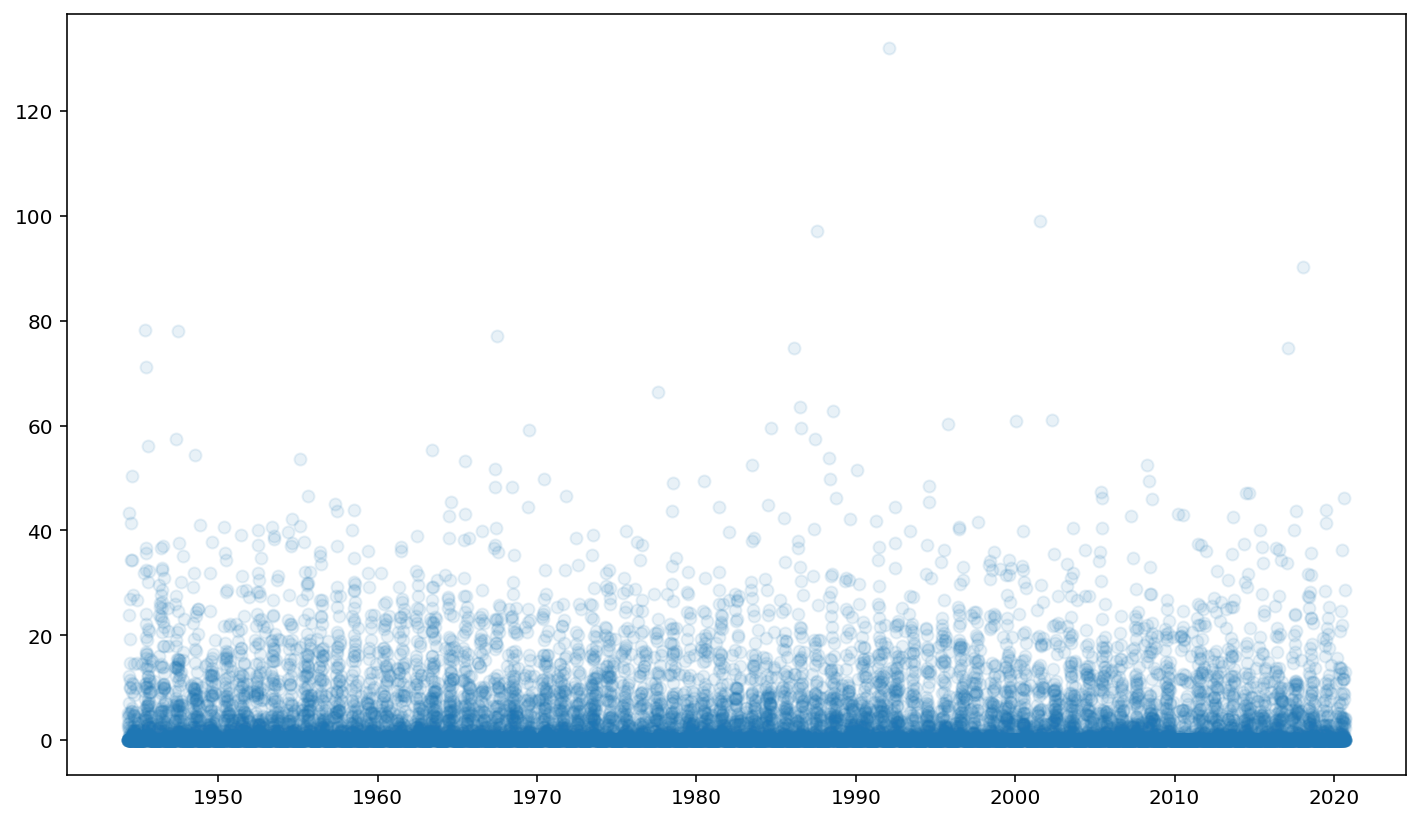

In [9]:
import matplotlib.pyplot as plt

DATA = "IDCJAC0009_009021_1800_Data.csv"

(days, rain, flags) = raindata(DATA)

plt.scatter(days, rain, alpha = 0.1)
plt.show()

There is a lot of overlap between the sample points. Once way to see better what is happening is to set the opaqueness (or, conversely, transparency) or *alpha* value.

* Check the documentation for plt.scatter() and set the alpha value to 0.1.

Can you see any trends yet?

### Comparing with averages

* Plot the data against a line showing the average rainfall received at the weather station.

Can you see any trends?

* Create a boolean mask (over the days) that can be used to extract the data between 1950 inclusive and 1960 exclusive.

'Inclusive' means it includes 1950 (the interval is closed on the left), 'exclusive' means it excludes 1960 (the interval is open on the right).

You should use `datetime64` objects to set the boundaries.

* Use your mask to plot the rainfall for the 1950s, against the average for the 1950s.

As its a bit less crowded, you might choose to use a little higher alpha value.

Your output might look something like this:

![](airport50s.png)

In [10]:
# Left and Right are datetime boundaries
def get_segment (days, rain, left, right) :

    mask = (np.logical_and(days >= left, days < right))
    xs = days[mask]

    focus = rain[mask]
    rain_mean_level = np.mean(focus)

    ys = np.ones(len(xs)) * rain_mean_level
    return (xs, ys)

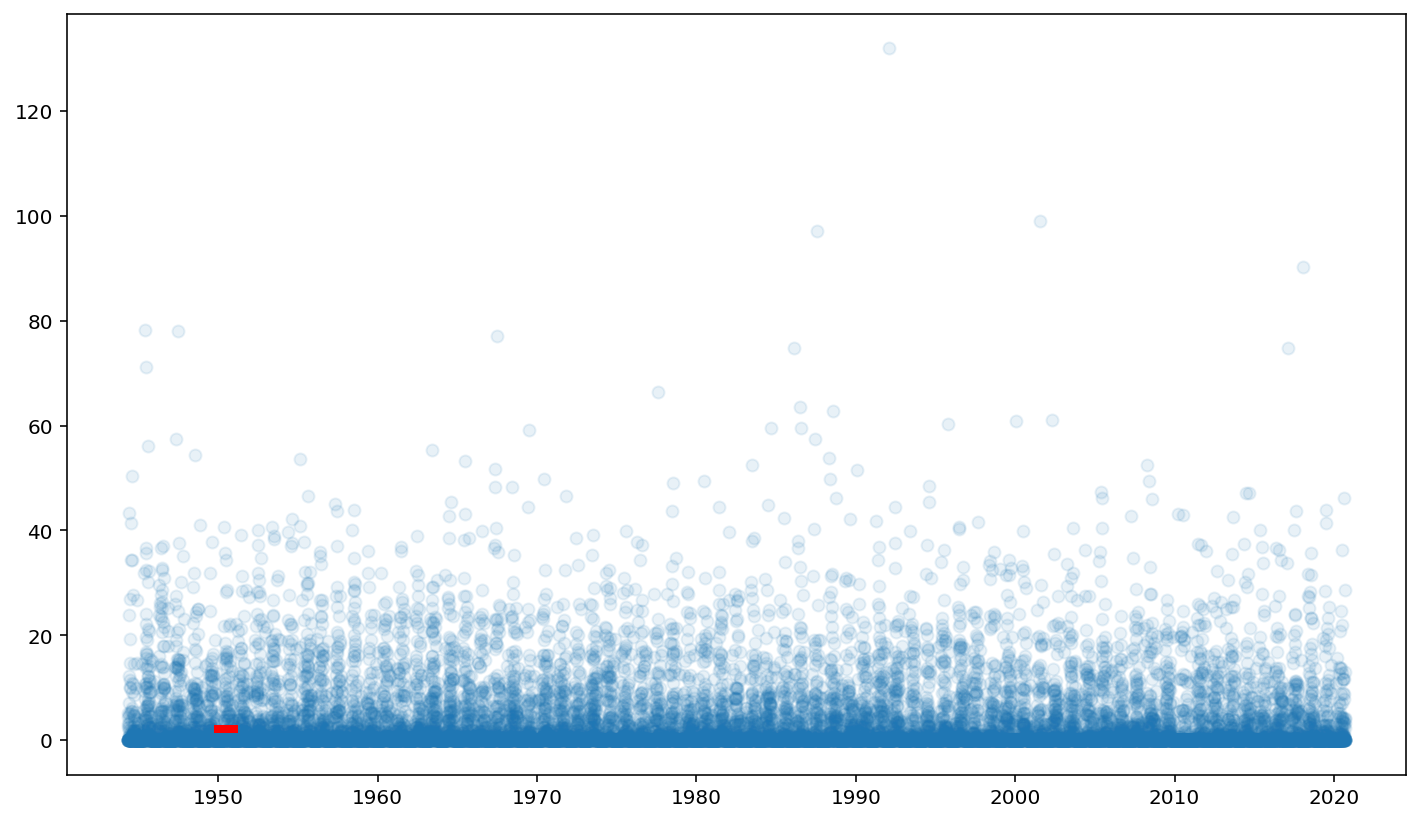

In [11]:
plt.scatter(days, rain, alpha = 0.1)

(xs, ys) = get_segment(days, rain, np.datetime64("1950", "D"), np.datetime64("1951", "D"))
plt.plot(xs, ys, color = "red", linewidth = 4)

Your boss says "I've changed my mind, I want to see the data from 1950 to 1951".

* Change your mask to meet the new spec and replot.

You shouldn't need to change anything except the mask - the plotting logic stays the same. Even though we haven't written a function (yet), this shows the power and elegance of reusable programming elements!

Let's go ahead and write a function.

* Write a function `get_averages(days, rain, first, last)` that:
   * takes the `days` and `rain` arrays and two dates, `first` and `last`
   * returns a pair `(selected_days, avs)` where
     * `selected_days` are those days that lie between first (inclusive) and last (exclusive)
     * `avs` is an array of values the same size as `selected_days`, which are all the same and are equal to the average rainfall over that period

As always, you should check your code on some values to satisfy yourself that it works.

In [12]:
# First and last are datetime boundaries
def get_average (days, rain, first, last) :

    mask = (np.logical_and(days >= first, days < last))
    selected_days = days[mask]

    focus = rain[mask]
    rain_mean_level = np.mean(focus)

    avs = np.ones(len(selected_days)) * rain_mean_level

    return (selected_days, avs)

* Generate your plot again, but this time use the above method to get the average between 1950 and 1960 and plot that as a line on the graph.

Increase the default width of the average line so its easier to see.

In [13]:
First = np.datetime64(days[0], "Y")
Last  = np.datetime64(days[-1], "Y")

print(str(First))
print(str(Last))

step = np.timedelta64(10, "Y")

decades = np.arange(
    np.datetime64(str(round(int(str(np.datetime64(days[0], "Y"))) - 5, -1)), "Y"),
    np.datetime64(str(round(int(str(np.datetime64(days[-1], "Y"))) + 6, -1)), "Y"),
    np.timedelta64(10, "Y"))

decades

1944
2020


array(['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010',
       '2020'], dtype='datetime64[Y]')

In [14]:
# How to round the datetime varieble
     first = np.datetime64(days[0], "Y")

arr = np.array(list(map(str, np.arange(1940, 2021, 10))), dtype = "datetime64")
arr

array(['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010',
       '2020'], dtype='datetime64[Y]')

* Use `arange` (one line) to generate an array containing all the decade start dates from 1940 to 2020.

Your array might look like this:

```array(['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'], dtype='datetime64[Y]')```

* Using this array as an iterable, call `get_averages` to successively plot each decade's average on your scatter plot.

Can you see any trend yet?

* Plot just the decadal averages on their own (without the scatter plot).

Can you see a trend?

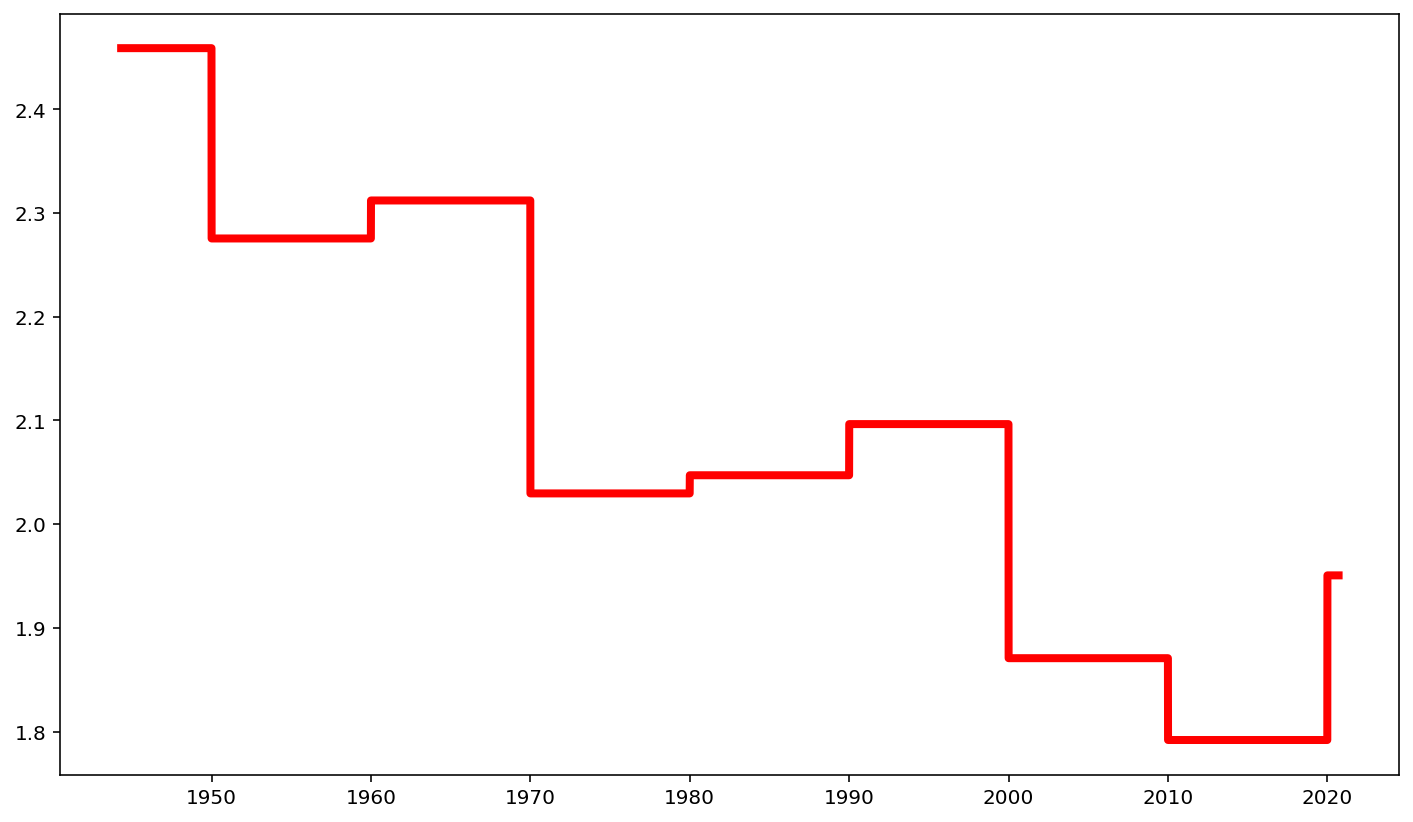

In [15]:
xbits = []
ybits = []

for decade in decades:
    (xbit, ybit) = get_average(days, rain, decade, decade + np.timedelta64(10, "Y"))
    xbits.extend(xbit)
    ybits.extend(ybit)


plt.plot(xbits, ybits, color = "red", linewidth = 4)
plt.show()

#### Accumulating the decadal means [2 lab marks]

Write a function `all_decades (days, rain)` that returns two arrays, one of x-values and one of y-values, that can be used to plot a single line of all the decadal averages as follows:
    
```
(mean_xs, mean_ys) = all_decades(days, rain)
plt.plot(mean_xs, mean_ys)
plt.show()
```

Here `mean_xs` should be dates (datetime64) and `mean_ys` should be average rainfall in mms (float).

As usual you may break it down into more than one function if you wish.

In [16]:
# First and last are datetime boundaries
def get_average (days, rain, first, last) :

    mask = (np.logical_and(days >= first, days < last))
    selected_days = days[mask]

    focus = rain[mask]
    rain_mean_level = np.mean(focus)

    avs = np.ones(len(selected_days)) * rain_mean_level

    return (selected_days, avs)

In [17]:
def all_decades (days, rain):

    first = np.datetime64(days[0], "Y")
    last  = np.datetime64(days[-1], "Y")
    step  = np.timedelta64(10, "Y")

    decades = np.arange(np.datetime64(str(round(int(str(first)) - 5, -1)), "Y"), np.datetime64(str(round(int(str(last)) + 6, -1)), "Y"), step)

    mean_xs = []
    mean_ys = []

    for decade in decades:
        (xs, ys) = get_average(days, rain, decade, decade + np.timedelta64(10, "Y"))
        mean_xs.extend(xs)
        mean_ys.extend(ys)

    return (mean_xs, mean_ys)

    # YOUR CODE HERE
    raise NotImplementedError()

In [18]:
from nose.tools import assert_equal
AIRPORT_DATA = "IDCJAC0009_009021_1800/IDCJAC0009_009021_1800_Data.csv"
(days, rain, flags) = raindata(AIRPORT_DATA)
(mean_xs, mean_ys) = all_decades(days, rain)
avs = list(zip(mean_xs, mean_ys))
assert_equal(avs[0],(np.datetime64('1944-05-01'), 2.458908739739256))


In [19]:
# marking use only


* Plot the average rainfall line.

### Flags

So far we have not taken into account the flags that indicate the data that has been checked and determined valid.

* Change your plot of the decadal means so that it plots a green line for all data that has been verified, and an amber (orange) line for all data that has yet to be verified. Include a legend that informs the reader of what the colours mean.

### Midland weather station data

We saw from our initial inspection that the Midland data has missing portions.

* Plot a line of decadal averages for the Midland data. This time use green for verified data, orange for unverified data, and red for any periods of missing data.



## Putting it all together

* Finally, plot the Midland and Perth Airport decadal lines on the same plot, using the 'traffic light' (red, orange, green) colour scheme, along with a legend.

What observations can you make?

&copy; Cara MacNish